
<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1><a id = "1" ></a>



We all know the Importance of good features for machine learning models. In Machine learning task we have features which we need to process to make them good and this is done by data preprocessing  tasks.

**Data Preprocessing** : Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

Data Preprocessing involves below steps:

- Getting the dataset
- Importing libraries
- Importing datasets
- Finding Missing Data
- Encoding Categorical Data

Many of us know traditional approaches for above listed steps but in this notebook I will discuss some different approaches which could be game changer for your next project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/loan-default-dataset/Loan_Default.csv")
df.head()  # displays the first 5 entries of dataset 
 # 5 rows x 34 columns means 5 entries, each having 34 features

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.iloc[0]

ID                                       24890
year                                      2019
loan_limit                                  cf
Gender                       Sex Not Available
approv_in_adv                            nopre
loan_type                                type1
loan_purpose                                p1
Credit_Worthiness                           l1
open_credit                               nopc
business_or_commercial                   nob/c
loan_amount                             116500
rate_of_interest                           NaN
Interest_rate_spread                       NaN
Upfront_charges                            NaN
term                                     360.0
Neg_ammortization                      not_neg
interest_only                          not_int
lump_sum_payment                      not_lpsm
property_value                        118000.0
construction_type                           sb
occupancy_type                              pr
Secured_by   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## df.info()
- this displays info of full dataset \
- for example, 0th feature / column is ID \
- Non-null Count means how many not null values that column contains. \
- Dtype is Data type. For example, object means String \

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

<h1  style="text-align: center" class="list-group-item list-group-item-action active">2. Handling Missing Values</h1><a id = "2" ></a>

Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases. Missing data can occur any number of ways, some of which include the following.

- Merging of source data sets
- Random events
- Failures of measurement



<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.1 Visualizing Missing Data</h2><a id = "2.1" ></a>


Visualizations as well as numeric summaries are the first step in understanding the challenge of missing information in a data set. For small to moderate data (100s of samples and 100s of attributes), several techniques are available that allow the visualization of all of the samples and Attributes simultaneously.

In this notebook I'll Cover Following visualizations for missing values:-
- Matrix
- Correlation Heatmap
- Dendrogram
- Simple numerical summaries

Question may arise that why we need Visualizations?
Because it is wise to explore relationships within the attributes that might be related to missingness. 

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.1.1 Matrix</h3><a id = "2.1.1" ></a>

It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

In [6]:
import missingno as msno

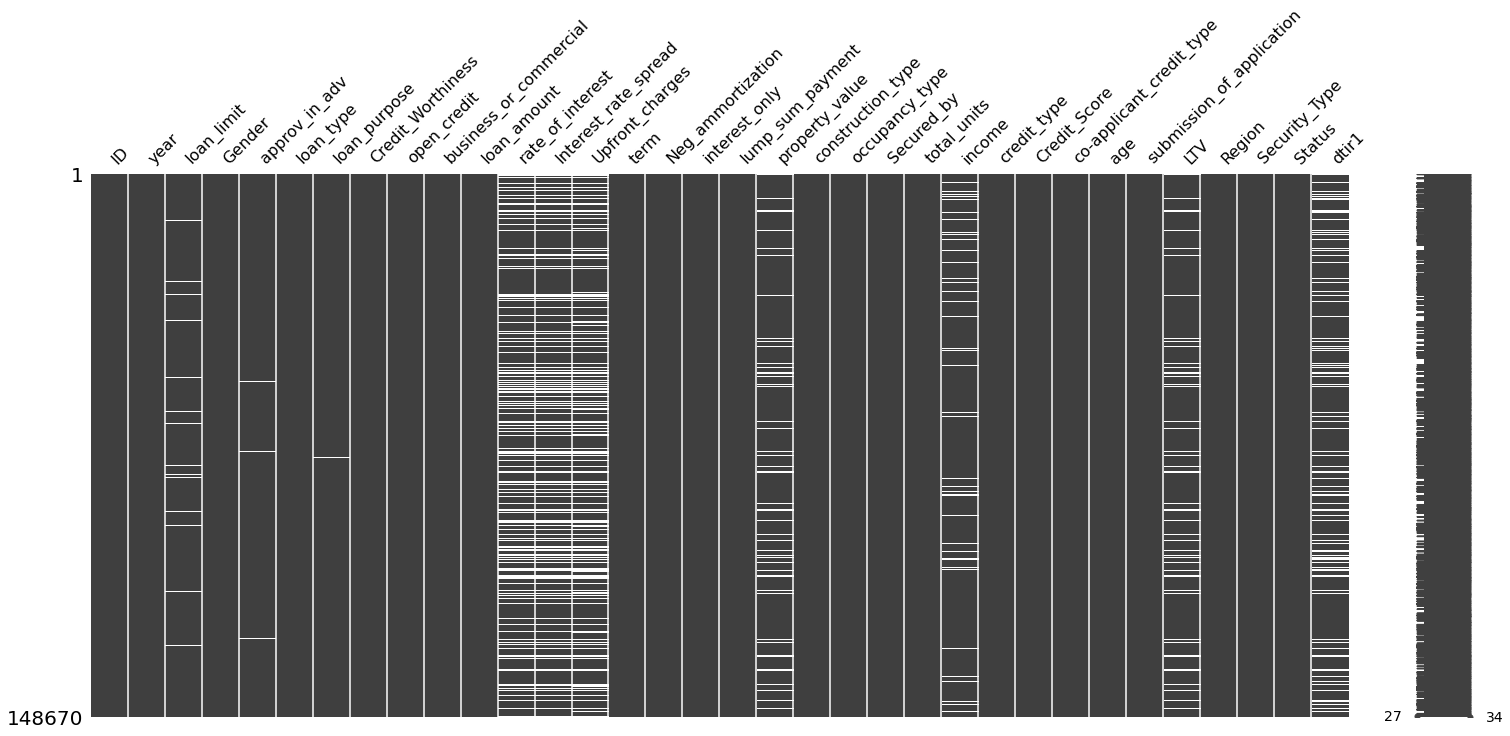

In [7]:
msno.matrix(df)
#plt.figure(figsize = (15,9))
plt.show()

From the above plot we can interpret our dataset has lots of missing values in it 


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.2 Methods to Handle Missing Data</h2><a id = "2.2" ></a>

As we Know if our data has missing values than our model will not train except few models which can tolerate them like some tree based models but the point is we want to handle this and how can we handle them. So, in this notebook to handle missing data I will discuss following techniques :-

- Deletion of Data 
- Encoding Missingness
- Imputation Methods


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.2.1 Deletion of Data </h3><a id = "2.2.1" ></a>



The simplest approach for dealing with missing values is to remove entire attribute(s) and/or sample(s) that contain missing values. However, one must carefully consider a number of aspects of the data prior to taking this approach. For example, missing values could be eliminated by removing all predictors that contain at least one missing value. Similarly, missing values could be eliminated by removing all samples with any missing values.

**Note: When it is difficult to obtain samples or when the data contain a small number of samples (i.e., rows), then it is not desirable to remove samples from the data.**

Consider this small intuition shown below

Let M = Number of Samples(rows).\
and Let N = Number of Attributes(columns).


Case 1: Deletion of Attributes

If N has range of [1-10]\
Then don't delete the attribute that contain missing values but if that attribute has missing values around 80-90% then deletion of that attribute will be good option instead of just predicting values of those 80-90% data based on that 10-20% data. 

Case 2: Deletion of Samples

If M is a large number according to your task\
Then deletion of sample can be a Good step but if that sample has few missing values with respect to attribute, then you should consider methods to fill those missing values.

Lets move on to the implementation part, I will just show how to delete data for both cases but you can interpret more according to your tasks.

In [8]:
total = 148000

above_25 = []

for col in df.columns:
    missing_count = df[col].isnull().sum()

    per = missing_count*100/total

    if per > 25:
        above_25.append(col)
    
    print(per)

0.0
0.0
2.2594594594594595
0.0
0.6135135135135135
0.0
0.09054054054054055
0.0
0.0
0.0
0.0
24.620945945945945
24.75608108108108
26.785135135135135
0.027702702702702704
0.08175675675675675
0.0
0.0
10.20135135135135
0.0
0.0
0.0
0.0
6.1824324324324325
0.0
0.0
0.0
0.13513513513513514
0.13513513513513514
10.20135135135135
0.0
0.0
0.0
16.29797297297297


**Deletion of an Attribute**

According to Simple numerical Summaries the attribute Upfront_charges has largest missing values percentage of (26.664%) which is not ideal percentage to remove a feature but just for sake of implementation I will remove that feature.

In [9]:
above_25

['Upfront_charges']

In [10]:
df.drop(above_25, axis=1)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [11]:
missing_columns = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_columns.append(col)

missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [12]:
# Same work: Short code
# Columns having missing values
'''
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

'''


'\nmissing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]\nmissing_columns\n\n'

**Deletion of the Samples**

We will try to delete those samples having missing values in more than 5 attributes  

In [13]:
df_temp = df.copy()

In [14]:
df_temp["missing_count"] = df_temp.isnull().sum(axis=1)

In [15]:
df_temp["missing_count"]

0         3
1         6
2         0
3         1
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: missing_count, Length: 148670, dtype: int64

In [16]:
df_temp.iloc[1]['missing_count']

6

In [17]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5
a = df_temp.shape[0]
print(f"Samples Before Removal : {a}")

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))


Samples Before Removal : 148670
Samples After Removal : 133507


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.2.2 Encoding Missingness </h3><a id = "2.2.2" ></a>



When an attribute is discrete in nature, missingness can be directly encoded into the attribute as if it were a naturally occurring category. For example in this dataset the attribute loan_limit has 3344 missing values so we can assign some new category to these missing values. 

In [18]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [19]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [20]:
df.loan_limit.value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

# Filling the missing String/object values with "missing" 
- .fillna() [na means N/A or not available data]

In [21]:
df_temp[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133507 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 130551 non-null  object
 1   approv_in_adv              132698 non-null  object
 2   loan_purpose               133398 non-null  object
 3   Neg_ammortization          133394 non-null  object
 4   age                        133363 non-null  object
 5   submission_of_application  133363 non-null  object
dtypes: object(6)
memory usage: 7.1+ MB


In [22]:
df_temp.loan_limit.value_counts()

cf     121819
ncf      8732
Name: loan_limit, dtype: int64

In [23]:
df_temp[cat_missing_cols] = df_temp[cat_missing_cols].fillna("missing")

In [24]:
df_temp[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133507 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 133507 non-null  object
 1   approv_in_adv              133507 non-null  object
 2   loan_purpose               133507 non-null  object
 3   Neg_ammortization          133507 non-null  object
 4   age                        133507 non-null  object
 5   submission_of_application  133507 non-null  object
dtypes: object(6)
memory usage: 7.1+ MB


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.2.3 Imputation Methods</h3><a id = "2.2.3" ></a>



Another approach to handling missing values is to impute or estimate them. Imputation uses information and relationships among the non-missing
attributes to provide an estimate to fill in the missing value.

In this section we will work on imputation models which will help us impute missing values by extracting interesting patterns from attributes which don't have missing values at that point on time.


- Within a sample data point, other variables may also be missing. For this reason, an imputation method should be tolerant of other missing data.

- Imputation creates a model embedded within another model. There is a prediction equation associated with every attribute in the training set that might have missing data. It is desirable for the imputation method to be fast and have a compact prediction equation.

- Many data sets often contain both numeric and discrete attributes. Rather than generating dummy variables for discrete attributes, a useful imputation method would be able to use attributes of various types as inputs.

- The model for predicting missing values should be numerically stable and not be overly influenced by outlying data points.

Virtually any machine learning model could be used to impute the data. Here, the focus will be on several that are good candidates to consider.

Question arise if an attribute has missing values around 50-60% then can we use imputation methods? And the answer is it depends upon datasets which we are using because an attribute with 60% missing values may has very good correlation with some other attribute which can be helpful to fill those missing values on the other side if let say some column like ID column which is independent of all columns has missing values around 10% using imputation methods we may not get results we wanted. 

In [25]:
num_col = [col for col in missing_columns if df_temp[col].dtype != 'object']
num_col

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [26]:
df_temp["rate_of_interest"]

0           NaN
2         4.560
3         4.250
4         4.000
5         3.990
          ...  
148665    3.125
148666    5.190
148667    3.125
148668    3.500
148669    4.375
Name: rate_of_interest, Length: 133507, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer



# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy="mean")

X = imputer.fit_transform(df_temp[num_col])

# Convert back to DataFrame (if you want column names)
num_imputed = pd.DataFrame(X, columns=num_col)


In [28]:
num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133507 entries, 0 to 133506
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rate_of_interest      133507 non-null  float64
 1   Interest_rate_spread  133507 non-null  float64
 2   Upfront_charges       133507 non-null  float64
 3   term                  133507 non-null  float64
 4   property_value        133507 non-null  float64
 5   income                133507 non-null  float64
 6   LTV                   133507 non-null  float64
 7   dtir1                 133507 non-null  float64
dtypes: float64(8)
memory usage: 8.1 MB


<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Encoding Categorical Attributes</h1><a id = "3" ></a>


Categorical Features are those that contain qualitative data.This Section focuses primarily on methods that encode categorical data to numeric values.

Categorical variables/features are any feature type can be classified into three major types:

- Nominal
- Ordinal
- Binary

**Nominal variables** are variables that have two or more categories which do not have any kind of order associated with them. For Example if our dataset has any 4 types of colors, i.e. Red, Blue, Orange, Green it can be considered as a nominal variable.

**Ordinal variables** on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

**Binary Variables** are same as nominal variables but with only categories For example, if gender is classified into two groups, i.e. male and female.

For Nominal Variables We generally uses Label Encoding Scheme in which we encode each category by just converting it to some integer values this kind of encoding can work in case of Ordinal variables but **for label encoding it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them**. This ordering issue is addressed in another common alternative approach called 'One-Hot Encoding'.

One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. **The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.**

Another big issue with encoding schemes is new category or while splitting data in train/validation/test set all samples of the rare classes may split into validation/test set then during it will raise error while predicting.  


In [29]:
df_temp.nunique()


ID                           133507
year                              1
loan_limit                        3
Gender                            4
approv_in_adv                     3
loan_type                         3
loan_purpose                      5
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     204
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             25
Neg_ammortization                 3
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                          960
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [30]:
df_temp.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1', 'missing_count'],
      dtype='object')

In [31]:
cat_col = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

cat_col


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [32]:
cat_imputed = df_temp[cat_col]

In [33]:
cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133507 entries, 0 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 133507 non-null  object
 1   Gender                     133507 non-null  object
 2   approv_in_adv              133507 non-null  object
 3   loan_type                  133507 non-null  object
 4   loan_purpose               133507 non-null  object
 5   Credit_Worthiness          133507 non-null  object
 6   open_credit                133507 non-null  object
 7   business_or_commercial     133507 non-null  object
 8   Neg_ammortization          133507 non-null  object
 9   interest_only              133507 non-null  object
 10  lump_sum_payment           133507 non-null  object
 11  construction_type          133507 non-null  object
 12  occupancy_type             133507 non-null  object
 13  Secured_by                 133507 non-null  

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse=False)  # drop="first" to avoid multicollinearity
one_hot_encoded = encoder.fit_transform(cat_imputed)
cat_encoded = pd.DataFrame(one_hot_encoded,
    columns=encoder.get_feature_names_out(cat_imputed.columns)
)


In [35]:
df_final = pd.concat([num_imputed, cat_encoded], axis=1)


In [36]:
df_final

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,loan_limit_missing,loan_limit_ncf,...,age_65-74,age_<25,age_>74,age_missing,submission_of_application_not_inst,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,4.045474,0.441656,3225.217287,360.0,118000.0,1740.0,98.728814,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,4.560000,0.200000,595.000000,360.0,508000.0,9480.0,80.019685,46.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,4.250000,0.681000,3225.217287,360.0,658000.0,11880.0,69.376900,42.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.000000,0.304200,0.000000,360.0,758000.0,10440.0,91.886544,39.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.990000,0.152300,370.000000,360.0,1008000.0,10080.0,70.089286,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133502,3.125000,0.257100,9960.000000,180.0,608000.0,7860.0,71.792763,48.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
133503,5.190000,0.854400,0.000000,360.0,788000.0,7140.0,74.428934,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
133504,3.125000,0.081600,1226.640000,180.0,728000.0,6900.0,61.332418,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
133505,3.500000,0.582400,4323.330000,180.0,278000.0,7140.0,70.683453,29.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num_imputed), columns=num_imputed.columns)


df_final = pd.concat([num_scaled, cat_encoded], axis=1)

In [38]:
df_final

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,loan_limit_missing,loan_limit_ncf,...,age_65-74,age_<25,age_>74,age_missing,submission_of_application_not_inst,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0.505684,0.583225,0.053754,1.000000,0.006667,0.003007,0.012485,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.570000,0.548678,0.009917,1.000000,0.030303,0.016385,0.010096,0.732143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.531250,0.617441,0.053754,1.000000,0.039394,0.020533,0.008737,0.660714,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.500000,0.563574,0.000000,1.000000,0.045455,0.018044,0.011611,0.607143,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.498750,0.541858,0.006167,1.000000,0.060606,0.017422,0.008827,0.625000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133502,0.390625,0.556841,0.166000,0.318182,0.036364,0.013585,0.009045,0.767857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
133503,0.648750,0.642230,0.000000,1.000000,0.047273,0.012341,0.009382,0.178571,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
133504,0.390625,0.531751,0.020444,0.318182,0.043636,0.011926,0.007709,0.785714,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
133505,0.437500,0.603345,0.072056,0.318182,0.016364,0.012341,0.008903,0.428571,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
